# Computer Algebra System (CAS)

SymPy is a Python library for symbolic mathematics. 
- [tutorial](https://docs.sympy.org/latest/tutorial/index.html)
- [documentation](https://docs.sympy.org/latest/tutorial/index.html)

Symbolic calculations begin by defining symbolic variables:

In [1]:
from sympy import *
x,y=symbols('x y')

Evaluate expressions containing symbolic variables:

In [2]:
x+y

x + y

In [3]:
(x+y)**2

(x + y)**2

In [4]:
expand((x + y)**2)

x**2 + 2*x*y + y**2

Substitute variables in expressions: Substitution replaces all instances of something in an expression with something else. It is done using the `subs` method.

In [5]:
z = x**2 + y**2

In [6]:
z

x**2 + y**2

replace y with a + b in the expression for z

In [7]:
a,b=symbols('a b')
z.subs(y,a+b)

x**2 + (a + b)**2

replace x with a + b in the expression for z

In [8]:
z.subs(x,a+b)

y**2 + (a + b)**2

Define and evaluate symbolic functions

In [9]:
f = Function('f')
f(x)+1

f(x) + 1

In [10]:
f = Function('f')(x,y)
f+1

f(x, y) + 1

To treat numbers symbolically rather than numerically, sym must be inserted:

In [11]:
import numpy as np
sin(np.pi)

1.22464679914735e-16

In [12]:
sin(pi)

0

Sometimes simplify needs to be called to simplify an expression:

In [13]:
g = (1 + sqrt(Symbol('5')))/2  #golden ratio
g

sqrt(5)/2 + 1/2

In [14]:
g**2-g-1 #should vanish

-sqrt(5)/2 + (sqrt(5)/2 + 1/2)**2 - 3/2

In [15]:
simplify(g**2-g-1)

5/4 - 5/4

Conversion between symbolic and numeric quantities:

In [16]:
nsimplify(0.25) #symbolic

1/4

In [17]:
1/3  #numeric

0.3333333333333333

In [18]:
S(1)/3         #symbolic

1/3

In [19]:
Rational(1,3)  #symbolic

1/3

In [20]:
Rational(1,3).evalf()

0.333333333333333

**Matrices**: A matrix can contain any symbolic expression.

In [21]:
Matrix([[1,2],[3,4]])

Matrix([
[1, 2],
[3, 4]])

In [22]:
Matrix([1,2,3])

Matrix([
[1],
[2],
[3]])

In [23]:
Matrix([1,2,3]).T

Matrix([[1, 2, 3]])

In [24]:
Matrix([[1,2,3]])

Matrix([[1, 2, 3]])

In [25]:
a,b,c=symbols('a b c')
Matrix([a,b,c])

Matrix([
[a],
[b],
[c]])

In [26]:
Matrix([[1,2],[3,4]])@Matrix([a,b]) # Python 3.5+

Matrix([
[  a + 2*b],
[3*a + 4*b]])

In [27]:
Matrix([[1,2],[3,4]])*Matrix([a,b])

Matrix([
[  a + 2*b],
[3*a + 4*b]])

calculating the jacobian

In [28]:
x1,x2,x3 = symbols('x1 x2 x3')
f1,f2,f3 = symbols('f1 f2 f3', cls=Function)
M = Matrix([f1(x1)+f1(x2)+f1(x3),f2(x1)+f2(x2)+f2(x3),f3(x1)+f3(x2)+f3(x3)])
M.jacobian([x1,x2,x3])

Matrix([
[Derivative(f1(x1), x1), Derivative(f1(x2), x2), Derivative(f1(x3), x3)],
[Derivative(f2(x1), x1), Derivative(f2(x2), x2), Derivative(f2(x3), x3)],
[Derivative(f3(x1), x1), Derivative(f3(x2), x2), Derivative(f3(x3), x3)]])

**Matrix Symbols**: operation on matrices of symbolic dimension $n\times m$

In [29]:
n, m = symbols('n m', integer=True)
M = MatrixSymbol('M', n, m)
b = MatrixSymbol('b', m, 1)
M@b

M*b

In [30]:
(M@b).shape

(n, 1)

In [31]:
Transpose(M@b)

(M*b).T

In [32]:
Transpose(M@b).doit()

b.T*M.T

## Algebraic equations

solves the equation for y

In [33]:
x = Symbol('x')
y = Symbol('y')

In [34]:
simplify(1/3)

0.333333333333333

In [35]:
solve(x**2-y, x)

[-sqrt(y), sqrt(y)]

### Linear systems

Example: $x +2y = u$, $4x + 5y = v$

In [36]:
x, y, u, v = symbols('x y u v')
system = Matrix(( (1, 2, u), (4, 5, v)))
solve_linear_system(system, x, y)

{x: -5*u/3 + 2*v/3, y: 4*u/3 - v/3}

In [37]:
x, y, u, v = symbols('x y u v')
solve((x+2*y-u,4*x+5*y-v), x, y)

{x: -5*u/3 + 2*v/3, y: 4*u/3 - v/3}

In [38]:
x_1, x_2, u, v = symbols('x_1 x_2 u v')
A = Matrix(((1, 2), (4, 5)))
b = Matrix(((u), (v)))
x = Matrix(((x_1), (x_2)))
solve(A*x-b, x_1, x_2)

{x_1: -5*u/3 + 2*v/3, x_2: 4*u/3 - v/3}

### Nonlinear systems

Example: $x^2 + 3y = 0$, $y^2+2x=0$

In [39]:
x, y = symbols('x y')
solve([x**2 + 3*y, y**2 + 2*x])

[{x: 0, y: 0},
 {x: -(12**(1/3)/2 + 2**(2/3)*3**(5/6)*I/2)**2/2,
  y: 12**(1/3)/2 + 2**(2/3)*3**(5/6)*I/2},
 {x: -(-3*2**(2/3)*3**(1/3)/4 - 12**(1/3)/4)**2/2,
  y: -3*2**(2/3)*3**(1/3)/4 - 12**(1/3)/4},
 {x: -(-12**(1/3)/4 + 3*2**(2/3)*3**(1/3)/4 - 2**(2/3)*3**(5/6)*I/2)**2/2,
  y: -12**(1/3)/4 + 3*2**(2/3)*3**(1/3)/4 - 2**(2/3)*3**(5/6)*I/2}]

### Exercise: 

Find all matrices of the form

$$
\left( \begin{array}{ccc} a&b&c\\c&a&b\\b&c&a \end{array} \right)
$$

with $a,b,c\in\mathbf{R}$ whose square is the unit matrix.

In [40]:
a, b, c = symbols('a b c')
M = Matrix(((a, b, c), (c, a, b), (b, c, a)))
solve(M**2-eye(3,3))

[{a: -1, b: 0, c: 0},
 {a: -1/3, b: 2/3, c: 2/3},
 {a: -1/3, b: -1/3 - sqrt(3)*I/3, c: -1/3 + sqrt(3)*I/3},
 {a: -1/3, b: -1/3 + sqrt(3)*I/3, c: -1/3 - sqrt(3)*I/3},
 {a: 1/3, b: -2/3, c: -2/3},
 {a: 1/3, b: 1/3 - sqrt(3)*I/3, c: 1/3 + sqrt(3)*I/3},
 {a: 1/3, b: 1/3 + sqrt(3)*I/3, c: 1/3 - sqrt(3)*I/3},
 {a: 1, b: 0, c: 0}]

### Assumptions on symbolic variables

In [41]:
x = symbols('x')
solve(x**3 + 1)

[-1, 1/2 - sqrt(3)*I/2, 1/2 + sqrt(3)*I/2]

In [42]:
x = symbols('x', real=True)
solve(x**3 + 1)

[-1]

In [43]:
x = symbols('x', positive=True)
solve(x**3 + 1)

[]

In [44]:
x.is_real

True

In [45]:
x.is_positive

True

reset assumptions

In [46]:
x = symbols('x')
solve(x**3 + 1)

[-1, 1/2 - sqrt(3)*I/2, 1/2 + sqrt(3)*I/2]

## Symbolic differentiation and integration

Differentiate a symbolic function:

In [47]:
f = Function('f')
Derivative(f(x),x,x)

Derivative(f(x), (x, 2))

In [48]:
diff(x**2*y,x)

2*x*y

In [49]:
diff(x**2*y,y)

x**2

Second order derivative

In [50]:
diff(x**2*y,x,x)

2*y

In [51]:
diff(x**2*y,x,2)

2*y

### Exercise: 

Determine

$$
\lim_{x\to 0} \frac{2\tan(x) - \tan(2x)}{x(1 - \cos(3x))}
$$

Here we use derivatives to determine limits. This is in particular useful, if we obtain limits that end up in inteterminate or undefined forms such as $\infty / \infty$, $-\infty / \infty$, or $0/0$. The latter is the case here.

#### L'Hopital's Rule:

If $\lim_{x\to 0} f(x)=0$ and $\lim_{x\to 0} g(x)=0$ and $\lim_{x\to 0} \frac{f'(x)}{g'(x)}=L$ then we can say that the limit $\lim_{x\to 0} \frac{f(x)}{g(x)}=L$.

In [52]:
x = symbols('x')
f=(2*tan(x) - tan(2*x))/(x*(1 - cos(3*x)))
f

(2*tan(x) - tan(2*x))/(x*(1 - cos(3*x)))

In [53]:
z = 2*tan(x) - tan(2*x)  #numerator
z.subs(x, 0)

0

In [54]:
z1 = diff(z)
z1.subs(x,0)

0

In [55]:
z2 = diff(z1)
z2.subs(x,0)

0

In [56]:
z3 = diff(z2)
z3.subs(x,0)

-12

In [57]:
n = x*(1 - cos(3*x))  #denominator
n.subs(x, 0)

0

In [58]:
n1 = diff(n)
n1.subs(x, 0)

0

In [59]:
n2 = diff(n1)
n2.subs(x, 0)

0

In [60]:
n3 = diff(n2)
n3.subs(x, 0)

27

Applying [L'Hopital's rule](https://www.khanacademy.org/math/ap-calculus-ab/ab-diff-contextual-applications-new/ab-4-7/v/introduction-to-l-hopital-s-rule) three times yields the desired limit:

In [61]:
(z1/n1).subs(x, 0)

nan

In [62]:
(z2/n2).subs(x, 0)

nan

In [63]:
(z3/n3).subs(x, 0)

-4/9

## Taylor expansion

A [Taylor series](https://mathworld.wolfram.com/TaylorSeries.html) is a series expansion of a function about a point. A one-dimensional Taylor series is an expansion of a real function $f(x)$ about a point $x=a$ is given by

$$f(x)=f(a)+f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+\dots+\frac{f^{(n)}(a)}{n!}(x-a)^n+\dots$$

The Taylor series of an unknown function $f(x)$ about a point $a$ up to order $n$ may be found using `series`.

In [64]:
x, h = symbols("x,h")
f = Function("f")
f(x).series(x, x0=h, n=3)

f(h) + (-h + x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, h) + (-h + x)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, h)/2 + O((-h + x)**3, (x, h))

The Taylor series of the function $\sin(x)$ about a point $x_0=0$ up to order $n=6$:

In [65]:
x = symbols("x")
sin(x).series(x, x0=0, n=6)

x - x**3/6 + x**5/120 + O(x**6)

The Taylor series of the function $\sin(x)$ about a point $x_0=0$ up to order $n=10$:

In [66]:
x = symbols("x")
sin(x).series(x, x0=0, n=10)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

The Taylor series of the function $\log(x)$ about a point $x_0=1$ up to order $n=6$:

In [67]:
x = symbols("x")
log(x).series(x, x0=1, n=6)

-1 - (x - 1)**2/2 + (x - 1)**3/3 - (x - 1)**4/4 + (x - 1)**5/5 + x + O((x - 1)**6, (x, 1))

If you want a finite (forward) [difference approximation](https://docs.sympy.org/latest/special_topics/finite_diff_derivatives.html) to derivatives, you can for example write

In [68]:
FW = f(x+h).series(x+h, x0=h, n=3)   #TODO
FW.subs(x+h,0)

f(2*h + x)

## Integration

SymPy implements methods to calculate definite and indefinite [integrals](https://docs.sympy.org/latest/modules/integrals/integrals.html) of expressions.
- `integrate(f,x)` returns the indefinite integral
- `integrate(f,(x,a))` returns the indefinite integral, with result given with $a$ replacing $x$
- `integrate(f,(x,a,b))` returns the definite integral

In [69]:
x = symbols("x")
f = Function("f")
f(x).integrate(x)

Integral(f(x), x)

In [70]:
x, a = symbols("x,a")
f = Function("f")
f(x).integrate((x,a))

Integral(f(x), (x, a))

In [71]:
x, a, b = symbols("x,a,b")
f = Function("f")
f(x).integrate((x,a,b))

Integral(f(x), (x, a, b))

We start with a quadratic polynomical and take a derivative:

In [72]:
x, a, b, c = symbols("x,a,b,c")
p = a*x**2 + b*x + c
dpdx = diff(p,x)
dpdx

2*a*x + b

Now we integrate to try and retrieve the function we started with:

In [73]:
p1 = integrate(dpdx,x)
p1

a*x**2 + b*x

**Note**: the integration constant is zero by default and thus needs to be added in by hand

In [74]:
p1 = p1 + c
p1

a*x**2 + b*x + c

#### Indefinite, definite and improper integrals

$$f(x)=\int \frac{1}{x^2}$$

In [75]:
integrate(1/x**2,x)

-1/x

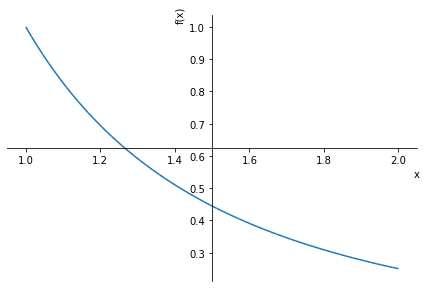

In [76]:
plot(1/x**2, (x, 1, 2))

In [77]:
integrate(1/x**2,(x,1,2))

1/2

In [78]:
integrate(1/x**2,(x, 1, oo))

1

$$\int_0^\inf \frac{1}{1 + x^4}$$

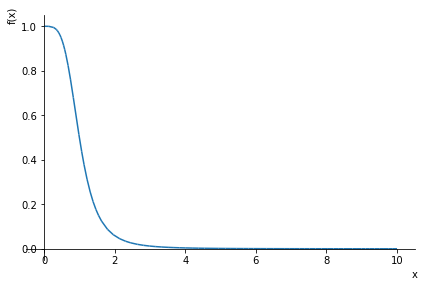

In [79]:
plot(1/(1 + x**4), (x, 0, 10))

In [80]:
integrate(1/(1 + x**4), (x, 0, oo))

sqrt(2)*pi/4

Of course not all integrals can be computed symbolically:

In [81]:
integrate(sin(sinh(x)), x)

Integral(sin(sinh(x)), x)

### Compute with Distributions
#### Heaviside Distribution

Heaviside function $\theta(x)$ has the following properties:
1. $\frac{d}{dx}\theta(x) = \delta(x)$
2. $\theta(x) = \begin{cases} 1 & x \geq 0\\ 0 & x < 0 \end{cases}$
3. $\frac{d}{dx}\max(x,0)=\theta(x)$

In [82]:
Heaviside(9)

1

In [83]:
Heaviside(-9)

0

There is some controversy about the behavior at $x=0$, Mathematica defines $\theta(0)=1$, but Maple uses $\theta(0)=\text{undefined}$. Different application areas may have specific conventions. For example, in control theory, it is common practice to assume $\theta(0)=0$ to match the Laplace transform of a DiracDelta distribution.

In [84]:
Heaviside(0,)

Heaviside(0)

To specify the value of Heaviside at $x=0$, a second argument can be given. Omit this 2nd argument or pass None to recover the default behavior.

In [85]:
Heaviside(0, S.Half)

1/2

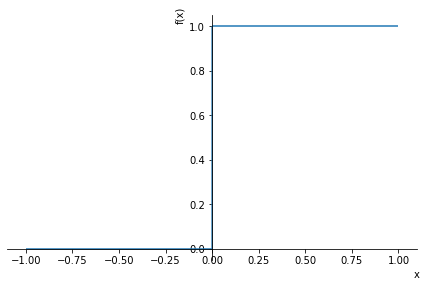

In [86]:
x = symbols("x ")
y = Heaviside(x)
plot(y, (x, -1, 1))

#### Dirac Distribution

DiracDelta function $\delta(x)$ has the following properties:

1. $\frac{d}{dx}\theta(x)=\delta(x)$
2. $\int_{a-\epsilon}^{a+\epsilon}\delta(x-a)f(x)=f(a)$
3. $\dots$

In [87]:
dydx = diff(y)
dydx

DiracDelta(x)

In [88]:
integrate(dydx,(x,-.1,.1))

1

In [89]:
integrate(dydx,(x,.1,.2))

0

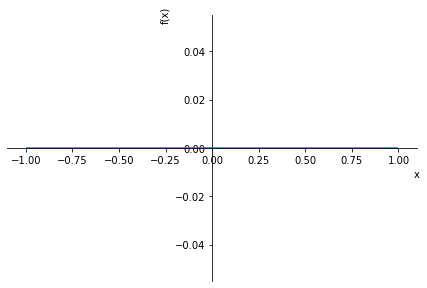

In [90]:
x = symbols("x ")
y = DiracDelta(x)
plot(y, (x, -1, 1))

In [91]:
DiracDelta(0)

DiracDelta(0)

## Ordinary differential equations (ODEs)

Example: $y''+4y=e^x$

In [92]:
x = symbols("x ")
f = Function('f')
dsolve(Derivative(f(x), x, x) + 4*f(x) - exp(x), f(x))

Eq(f(x), C1*sin(2*x) + C2*cos(2*x) + exp(x)/5)

We can also add initial conditions, e.g. $y(0)=1$, $y'(0)=0$:

In [93]:
dsolve(Derivative(f(x), x, x) + 4*f(x) - exp(x), f(x), ics={f(0): 1, f(x).diff(x).subs(x, 0): 0})

Eq(f(x), exp(x)/5 - sin(2*x)/10 + 4*cos(2*x)/5)

**Exercise**: Solve the ODE of [Bernoulli type](https://en.wikipedia.org/wiki/Bernoulli_differential_equation) $y^3 - x^2 + x y^2 y' = 0$ with initial condition $y(1)=1$.

In [94]:
x = Symbol('x')
f = Function('f')
dsolve(f(x)**4-x**2+x*f(x)**2*Derivative(f(x), x), f(x), ics={f(1): 1})

Eq(f(x), 1 + (x - 1)**2 - 5*(x - 1)**3/3 + 23*(x - 1)**4/12 - 26*(x - 1)**5/15 + O(x**6))

### Systems of ODEs

Example: $f'=3f + 4g$, $g'=-4f+3g$

In [95]:
x = Symbol('x')
f = Function('f')
g = Function('g')
eq = (Eq(Derivative(f(x),x),3*f(x)+4*g(x)),Eq(Derivative(g(x),x),-4*f(x)+3*g(x)))
dsolve(eq)

[Eq(f(x), C1*exp(3*x)*sin(4*x) + C2*exp(3*x)*cos(4*x)),
 Eq(g(x), C1*exp(3*x)*cos(4*x) - C2*exp(3*x)*sin(4*x))]

Again we can add initial conditions, e.g. $f(0)=0$, $g(0)=1$:

In [96]:
S = dsolve(eq, ics={f(0): 0, g(0): 1})

In [97]:
S[0].rhs

exp(3*x)*sin(4*x)

In [98]:
S[1].rhs

exp(3*x)*cos(4*x)

## Code generation

SymPy allows one to [generate directly compilable and executable code](https://docs.sympy.org/latest/modules/codegen.html) in a variety of different programming languages from SymPy expressions. In addition, there are functions that generate Python importable objects that can evaluate SymPy expressions very efficiently.

- [tutorial: https://www.sympy.org/scipy-2017-codegen-tutorial/](https://www.sympy.org/scipy-2017-codegen-tutorial/)

### Code Printer

Code printer convert SymPy expressions into the target language. A list of supported languages is [here](https://docs.sympy.org/latest/modules/printing.html). 

In [99]:
pretty_print(S[1].rhs)

 3⋅x         
ℯ   ⋅cos(4⋅x)


In [100]:
pprint(S[1].rhs)

 3⋅x         
ℯ   ⋅cos(4⋅x)


In [101]:
print_latex(S[0])

f{\left(x \right)} = e^{3 x} \sin{\left(4 x \right)}


In [102]:
latex(S[0])

'f{\\left(x \\right)} = e^{3 x} \\sin{\\left(4 x \\right)}'

In [103]:
print_ccode(S[1].rhs)

exp(3*x)*cos(4*x)


In [104]:
ccode(S[1].rhs)

'exp(3*x)*cos(4*x)'

In [105]:
mathematica_code(S[1].rhs)

'Exp[3*x]*Cos[4*x]'

In [106]:
jscode(S[1].rhs)

'Math.exp(3*x)*Math.cos(4*x)'

In [107]:
fcode(S[1].rhs)

'      exp(3.0d0*x)*cos(4.0d0*x)'

In [108]:
julia_code(S[1].rhs)

'exp(3*x).*cos(4*x)'

In [109]:
octave_code(S[1].rhs)

'exp(3*x).*cos(4*x)'

In [110]:
rust_code(S[1].rhs)

'(3*x).exp()*(4*x).cos()'

In [111]:
pycode(S[1].rhs)

'math.exp(3*x)*math.cos(4*x)'

In [112]:
print_python(S[1].rhs)

x = Symbol('x')
e = exp(3*x)*cos(4*x)


**Exercise**: Plotting SymPy functions with JavaScript

In this call we load the [Chart.js library](https://www.chartjs.org):

%%javascript
require.config({
    paths: {
        'chartjs': '//cdnjs.cloudflare.com/ajax/libs/Chart.js/2.6.0/Chart'
    }
});

Here is some JavaScript to do the plotting. The code will take two mathematical expressions in JavaScript and plot the functions:

In [113]:
js_template = """\
require(['chartjs'], function(chartjs){{
function f(x) {{
    return {top_function}
}};
function g(x) {{
    return {bottom_function}
}};
function linspace(a,b,n) {{
    // From: https://gist.github.com/joates/6584908
    if(typeof n === "undefined") n = Math.max(Math.round(b-a)+1,1);
    if(n<2) {{ return n===1?[a]:[]; }}
    var i,ret = Array(n);
    n--;
    for(i=n;i>=0;i--) {{ ret[i] = (i*b+(n-i)*a)/n; }}
    return ret;
}}
var ctx = document.getElementById("{chart_id}");
var data = {{
    labels: linspace(-7.5, 7.5, 500),
    datasets: [{{
        label: "top",
        function: f,
        borderColor: "rgba(75, 192, 192, 1)",
        data: [],
        fill: false,
        lineTension: 0,
    }},
    {{
        label: "bottom",
        function: g,
        borderColor: "rgba(153, 102, 255, 1)",
        data: [],
        fill: false,
        lineTension: 0,
    }}]
}};
chartjs.Chart.pluginService.register({{
    beforeInit: function(chart) {{
        var data = chart.config.data;
        for (var i = 0; i < data.datasets.length; i++) {{
            for (var j = 0; j < data.labels.length; j++) {{
                var fct = data.datasets[i].function,
                    x = data.labels[j],
                    y = fct(x);
                data.datasets[i].data.push(y);
            }}
        }}
    }}
}});
var myBarChart = new chartjs.Chart(ctx, {{
    type: 'line',
    data: data,
    options: {{
        scales: {{
            yAxes: [{{
                ticks: {{
                    beginAtZero:true
                }}
            }}]
        }}
    }}
}});
}});
element.append("<canvas id='{chart_id}' width='400'></canvas>");\
"""

In [114]:
print(js_template.format(top_function='*** TODO ***', 
                         bottom_function='*** TODO ***', 
                         chart_id='*** TODO ***'))

require(['chartjs'], function(chartjs){
function f(x) {
    return *** TODO ***
};
function g(x) {
    return *** TODO ***
};
function linspace(a,b,n) {
    // From: https://gist.github.com/joates/6584908
    if(typeof n === "undefined") n = Math.max(Math.round(b-a)+1,1);
    if(n<2) { return n===1?[a]:[]; }
    var i,ret = Array(n);
    n--;
    for(i=n;i>=0;i--) { ret[i] = (i*b+(n-i)*a)/n; }
    return ret;
}
var ctx = document.getElementById("*** TODO ***");
var data = {
    labels: linspace(-7.5, 7.5, 500),
    datasets: [{
        label: "top",
        function: f,
        borderColor: "rgba(75, 192, 192, 1)",
        data: [],
        fill: false,
        lineTension: 0,
    },
    {
        label: "bottom",
        function: g,
        borderColor: "rgba(153, 102, 255, 1)",
        data: [],
        fill: false,
        lineTension: 0,
    }]
};
chartjs.Chart.pluginService.register({
    beforeInit: function(chart) {
        var data = chart.config.data;
        for (var i = 0; 

SymPy functions now can be plotted by filling in the two missing expressions and the id in the above boilerplate code. Then call the JavaScript display function on that code: 

In [115]:
from IPython.display import Javascript

In [116]:
x=symbols('x')
f1=sin(x)
f2=cos(x)
Javascript(js_template.format(top_function=jscode(f1), 
                              bottom_function=jscode(f2), 
                              chart_id='sincos'))

<IPython.core.display.Javascript object>

### Lamdify SymPy expressions

Here we convert SymPy expression evaluation to Python Lambda functions. SymPy evaluation is arbitrary precision and therefore very slow. In many cases it may be usefull to first create a Lambda function and then evaluate the function numerically.

Lets create a SymPy expression an record the time for the symbolic evaluation:

In [117]:
y, y = symbols('x y')
expr = 3*x**2 + log(x**2 + y**2 + 1)
expr

3*x**2 + log(x**2 + y**2 + 1)

In [118]:
expr.subs({x: 17, y: 42}).evalf()

874.627544390489

In [119]:
%timeit expr.subs({x: 17, y: 42}).evalf()

326 µs ± 67.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Now we create a python lambda function and compare the time for numeric evaluation.

In [120]:
import math
f = lambda x, y: 3*x**2 + math.log(x**2 + y**2 + 1)
f(17,42)

874.6275443904885

In [121]:
%timeit f(17,42)

1.85 µs ± 89.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Unsuprisingly, the numeric evaluation is much faster. However, the advantave is deminished by the time we spend coding the python lambda function. Here comes in `lambdify`, that generates python code and execute `eval` on it.  

In [122]:
%timeit lambdify([x,y], expr, modules=['math'])(17,42)

2.93 ms ± 345 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [123]:
g=lambdify([x,y], expr, modules=['math'])
g(17,42)

874.6275443904885

In [124]:
%timeit g(17,42)

2.16 µs ± 188 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The code generation uses numpy by default (without `modules` parameter). 

In [125]:
g=lambdify([x,y], expr)
g(np.linspace(17,18,5),42)

array([874.62754439, 900.31920442, 926.38590757, 952.82765322,
       979.64444076])

We can get a specific function signature from `lambdify`. In the following example, the function expects a tripple as third argument.

In [126]:
z = z1, z2, z3 = symbols('z:3')
expr = x*y*(z1+z2+z3)
expr

x*y*(z0 + z1 + z2)

In [127]:
lambdify([x,y,z],expr)(1,2,[3,4,5])

24

**Exercise**: Plot $z(x,y)=\frac{df(x,y)}{dxdy}$ from $f(x,y)=3 x^{2} + \log{\left(x^{2} + y^{2} + 1 \right)}$ 

In [128]:
y, y = symbols('x y')
expr = 3*x**2 + log(x**2 + y**2 + 1)
expr

3*x**2 + log(x**2 + y**2 + 1)

In [129]:
d2fdxdy = expr.diff(x,y)
xplot = np.outer(np.linspace(-5,5,100),np.ones(100))
yplot = xplot.T
zplot = lambdify([x, y],d2fdxdy)(xplot,yplot)

In [130]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


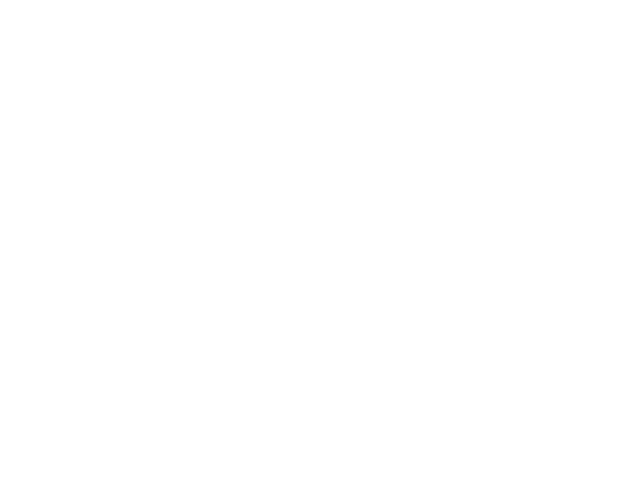

Text(0.5, 0, '$- \\frac{4 x y}{\\left(x^{2} + y^{2} + 1\\right)^{2}}$')

In [131]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xplot,yplot,zplot,cmap=plt.cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$%s$'% latex(d2fdxdy))

In [132]:
%matplotlib notebook

The [**competitive Lotka–Volterra equations**](https://en.wikipedia.org/wiki/Competitive_Lotka–Volterra_equations) are a simple model of the population dynamics of species competing for some common resource. They are a system of differential equations that describe the dynamics of a pair of species that interact, one as a predator and the other as a prey.
The coupled first-order non-linear differential equations are given by

$$\frac{dN_1}{dt}=\frac{N_{1} r_{1} \left(K_{1} - N_{1} - N_{2} \alpha\right)}{K_{1}}$$

$$\frac{dN_2}{dt}=\frac{N_{2} r_{2} \left(K_{2} - N_{1} \beta - N_{2}\right)}{K_{2}}$$

where
- $N_i$ = population size of species $i$
- $t$ = time
- $r_i$ = species $i$ growth rate
- $K_i$ = environment carrying capacity
- $\alpha,\beta$ = inter-species interaction parameters.

If species 2 is the predator and species 1 is the prey, then $\alpha$ must be positive (since the predator eats the prey reducing its population) and $\beta$ must be negative since the predator needs the prey to get food.

Define the variables:

In [133]:
# We split it into two definitions to remind us that
# a set of variables is for species 1 and the other one for species 2

# Species 1
r1, K1, N1, alpha = symbols('r_1 K_1 N_1 alpha')

# Species 2
r2, K2, N2, beta = symbols('r_2 K_2 N_2 beta')

We can now define the differential equations in sympy

In [134]:
dN1_dt = r1 * N1 * (K1 - N1 - alpha * N2) / K1
dN1_dt

N_1*r_1*(K_1 - N_1 - N_2*alpha)/K_1

In [135]:
dN2_dt = r2 * N2 * (K2 - N2 - beta * N1) / K2
dN2_dt

N_2*r_2*(K_2 - N_1*beta - N_2)/K_2

Usually one of the first things we do when analyzing a dynamical system is to find the steady state, i.e. finding when the derivative with respect to time equals to zero.

We define the equality using the `Eq`:

In [136]:
ss_N1 = Eq(dN1_dt, 0)
ss_N1

Eq(N_1*r_1*(K_1 - N_1 - N_2*alpha)/K_1, 0)

In [137]:
ss_N2 = Eq(dN2_dt, 0)
ss_N2

Eq(N_2*r_2*(K_2 - N_1*beta - N_2)/K_2, 0)

Solve for the species population:

In [138]:
ss_N1_sol = solve(ss_N1, N1)
ss_N2_sol = solve(ss_N2, N2)

print('The steady state solution for both species are:')
ss_N1_sol, ss_N2_sol

The steady state solution for both species are:


([0, K_1 - N_2*alpha], [0, K_2 - N_1*beta])

So we find that there are two steady state solutions:
1. The trivial solutions in which both species are extinct $N_1=N_2=0$
2. A solution in which both species maintain their non-zero populations.

We can use sympy's solve function to solve simultaneously for both species. The solution is returned as a dictionary where each key is the name of the respective variable.

In [139]:
ss_dict = solve((Eq(N1, ss_N1_sol[1]), Eq(N2, ss_N2_sol[1])),(N1, N2))
ss_dict

{N_1: (-K_1 + K_2*alpha)/(alpha*beta - 1),
 N_2: (K_1*beta - K_2)/(alpha*beta - 1)}

We can use scipy's numerical solver to run a simulation for this system of equations.

**Note**: we use `lambdify` to numerically evaluate the diff. equations

In [140]:
# Generate 'lambdify' functions to numerically evaluate the diff. equations
dN1_dt_num = lambdify([N1, N2, r1, K1, alpha], dN1_dt)
dN2_dt_num = lambdify([N2, N1, r2, K2, beta], dN2_dt)


def lotka_voltera_rhs(n1_n2, t, *p):
    '''
    Set up the right hand side (rhs) function for the system 
    (necessary step to feed sympy's odeint function).
    '''
    # unpack the variables
    n1, n2 = n1_n2
    
    # unpack the parameters
    r_1, k1, a, r_2, k2, b = p
    
    # Define derivatices rom lambdified functions
    n1dot = dN1_dt_num(n1, n2, r_1, k1, a)
    n2dot = dN2_dt_num(n2, n1, r_2, k2, b)

    return np.array([n1dot, n2dot])

Now let's define the parameters and numerically solve the system

In [141]:
from scipy.integrate import odeint
# let's set the parameter values.
r_1, r_2 = [0.5, 0.2]
k1, k2 = [100, 50]
a, b = [1.2, 0.2]
args = (r_1, k1, a, r_2, k2, b)

# Initial population size
n1_n2_0 = [2, 2]

# Time points we want to consider
t = np.linspace(0, 100, 1000)

# Now let's use odeint to solve the function
n1_n2 = odeint(lotka_voltera_rhs, n1_n2_0, t, args=args)

We will now plot the solution

<IPython.core.display.Javascript object>


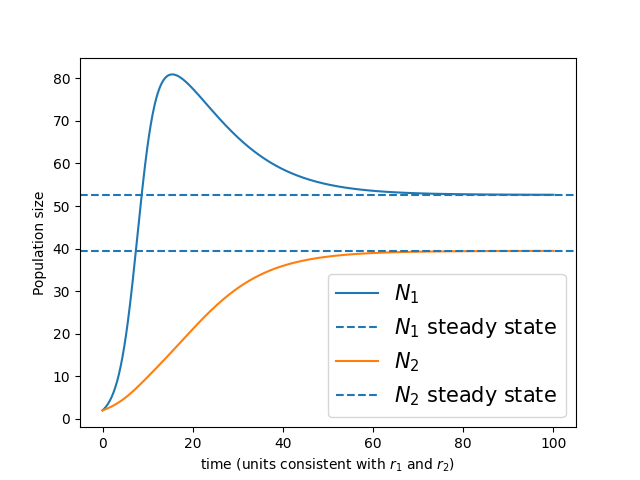

Text(0, 0.5, 'Population size')

In [142]:
for i, N in enumerate([N1, N2]):
    plt.plot(t, n1_n2[:, i], label=r'${0:s}$'.format(latex(N)))
    plt.axhline(y=ss_dict[N].subs({K1: k1, K2: k2, alpha: a, beta: b}),
                linestyle='--',
                label=r'${0:s}$ steady state'.format(latex(N)))

plt.legend(loc=0, fontsize=15)
plt.xlabel('time (units consistent with $r_1$ and $r_2$)')
plt.ylabel('Population size')

The [**generalised Lotka-Volterra equations**](https://en.wikipedia.org/wiki/Generalized_Lotka–Volterra_equation) model the dynamics of the populations $x_1, x_2, \dots, x_n$ of $n$ biological species. Together, these populations can be considered as a vector $\mathbf{x}$. They are a set of ordinary differential equations given by

$$\frac{dx_i}{dt}=x_i f_i(\mathbf{x})$$

where the vector $\mathbf{f}$  is given by

$$\mathbf{f}=\mathbf{r}+\mathbf{A}\mathbf{x}$$

where $\mathbf{r}$ is a vector and $\mathbf{A}$ is a matrix known as the [community matrix](https://en.wikipedia.org/wiki/Community_matrix).

In [143]:
y0 = Function('y0')
y1 = Function('y1')
y2 = Function('y2')
t = symbols('t')
C1, C2, C3 = symbols('C1, C2, C3')
b0,b1,b2 = symbols('b0:3')

y = Matrix([y0(t), y1(t), y2(t)])
B = Matrix([b0,b1,b2])

ode = (y.diff(t) - y).T.tolist()[0]
soln = dsolve(ode, y.T.tolist()[0])
soln

[Eq(y0(t), C1*exp(t)), Eq(y1(t), C2*exp(t)), Eq(y2(t), C3*exp(t))]

<IPython.core.display.Javascript object>


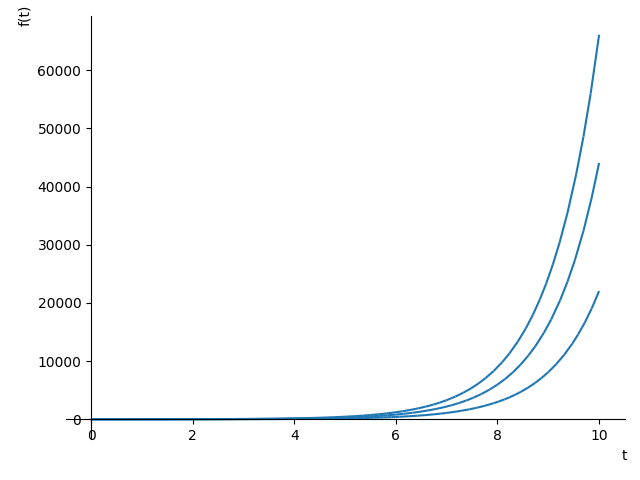

In [144]:
p1=plot(soln[0].subs({C1:1}).rhs,(t,0,10),show=False)
p2=plot(soln[1].subs({C2:2}).rhs,(t,0,10),show=False)
p3=plot(soln[2].subs({C3:3}).rhs,(t,0,10),show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.show()

Can this be written more general for any $n$?